In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
file_path = 'Polish_real_estate_apartment_rental_2022.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,week_no,county,market_segment,average_price_per_square_meter_pln,lower_quartile_price_per_square_meter_pln,median_price_per_square_meter_pln,upper_quartile_price_per_square_meter_pln,average_size_square_meters,lower_quartile_size_square_meters,median_size_square_meters,...,building_material_block_cnt,building_material_wood_cnt,building_material_mixed_cnt,building_material_silicate_cnt,building_material_reinforced_concrete_cnt,building_material_large_slab_cnt,building_material_other_cnt,building_material_h_frame_cnt,building_material_ytong_cnt,cnt
0,2022W01,aleksandrowski,size_from_25_to_40_m2,35.306735,31.531532,33.333333,38.095238,36.00,35.50,36.0,...,0,0,0,0,0,0,0,0,0,3
1,2022W01,aleksandrowski,size_from_40_to_60_m2,33.611111,29.305556,33.611111,37.916667,44.50,44.25,44.5,...,0,0,1,0,0,0,0,0,0,2
2,2022W01,aleksandrowski,size_from_60_to_90_m2,31.347118,30.000000,31.265664,32.612782,69.75,68.25,70.0,...,0,0,0,0,0,0,0,0,0,4
3,2022W01,augustowski,size_from_25_to_40_m2,45.000000,45.000000,45.000000,45.000000,30.00,30.00,30.0,...,0,0,0,0,0,0,0,0,0,1
4,2022W01,augustowski,size_from_60_to_90_m2,30.952381,29.761905,30.952381,32.142857,65.00,62.50,65.0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
week_no                                       0
county                                        0
market_segment                                0
average_price_per_square_meter_pln           69
lower_quartile_price_per_square_meter_pln    69
median_price_per_square_meter_pln            69
upper_quartile_price_per_square_meter_pln    69
average_size_square_meters                   66
lower_quartile_size_square_meters            66
median_size_square_meters                    66
upper_quartile_size_square_meters            66
average_price_pln                             0
lower_quartile_price_pln                      0
median_price_pln                              0
upper_quartile_pln                            0
built_from_year_2010_cnt                      0
built_from_year_2000_to_2010_cnt              0
built_from_year_1990_to_2000_cnt              0
built_from_year_1945_to_1990_cnt              0
built_to_year_1945_cnt                        0
single_r

In [5]:
print(f"\nShape before dropping: {data.shape}")


Shape before dropping: (47209, 44)


In [6]:
data = data.dropna()

print(f"\nShape after dropping missing values: {data.shape}")


Shape after dropping missing values: (47140, 44)


In [7]:
# Encoding categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}


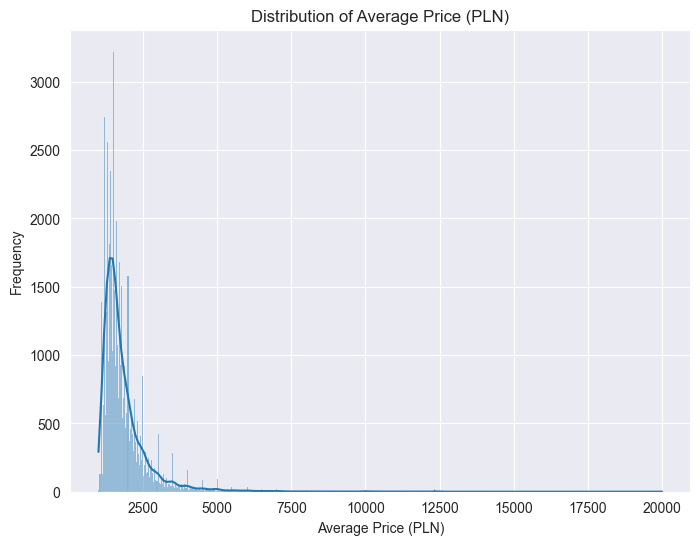

In [31]:
data_show = data[data['average_price_pln'] <= 20000]

# for col in categorical_columns:
#     le = LabelEncoder()
#     data[col] = le.fit_transform(data[col])
#     label_encoders[col] = le
    
# Visualize distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data_show['average_price_pln'], kde=True, bins='auto')
plt.title('Distribution of Average Price (PLN)')
plt.xlabel('Average Price (PLN)')
plt.ylabel('Frequency')
plt.show()


In [9]:
(data['average_price_pln'] > 20000).sum()

np.int64(39)

In [32]:
# Splitting the dataset into training and testing sets
X = data.drop(columns=['average_price_pln'])
y = data['average_price_pln']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and testing set sizes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")



Training and testing set sizes:
X_train: (37712, 43), X_test: (9428, 43)


In [34]:
# Training a Gradient Boosting model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [13]:
# Making predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [29]:
print("\nModel evaluation metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Model evaluation metrics:
Mean Absolute Error (MAE): 47.073485066787974
Mean Squared Error (MSE): 36466.748897975005
Root Mean Squared Error (RMSE): 190.9626898060849
R^2 Score: 0.9811854610128851


In [17]:
import lightgbm as lgb

In [18]:
# LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5002
[LightGBM] [Info] Number of data points in the train set: 37712, number of used features: 43
[LightGBM] [Info] Start training from score 1908.850833


In [19]:
import xgboost as xgb


In [20]:
# XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

C:\Users\antos\PycharmProjects\curse_ova\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:13:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [30]:
# Evaluating the models
models = {
    'LightGBM': lgb_pred,
    'XGBoost': xgb_pred
}

print("\nModel evaluation metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

for name, pred in models.items():
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, pred)

    print(f"\n{name} Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")



Model evaluation metrics:
Mean Absolute Error (MAE): 47.073485066787974
Mean Squared Error (MSE): 36466.748897975005
Root Mean Squared Error (RMSE): 190.9626898060849
R^2 Score: 0.9811854610128851

LightGBM Model Evaluation:
Mean Absolute Error (MAE): 42.50216457989773
Mean Squared Error (MSE): 48702.10398767124
Root Mean Squared Error (RMSE): 220.6855318947557
R^2 Score: 0.974872790640203

XGBoost Model Evaluation:
Mean Absolute Error (MAE): 50.34788341410493
Mean Squared Error (MSE): 325080.4302022983
Root Mean Squared Error (RMSE): 570.1582501396417
R^2 Score: 0.8322790319175161


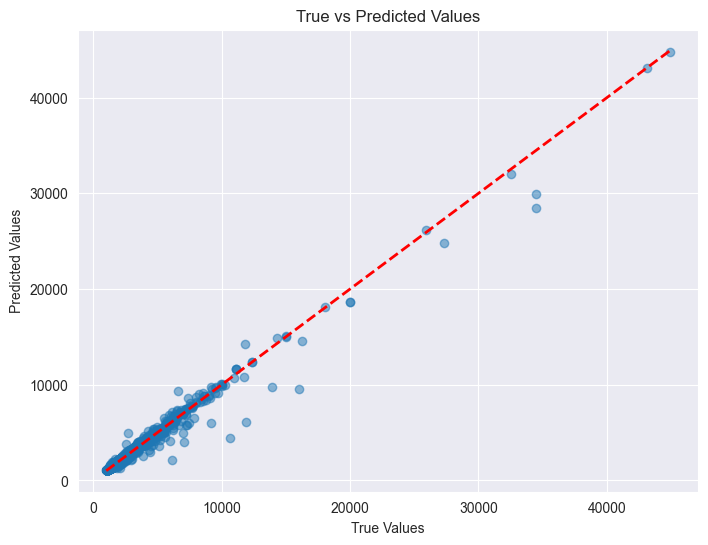

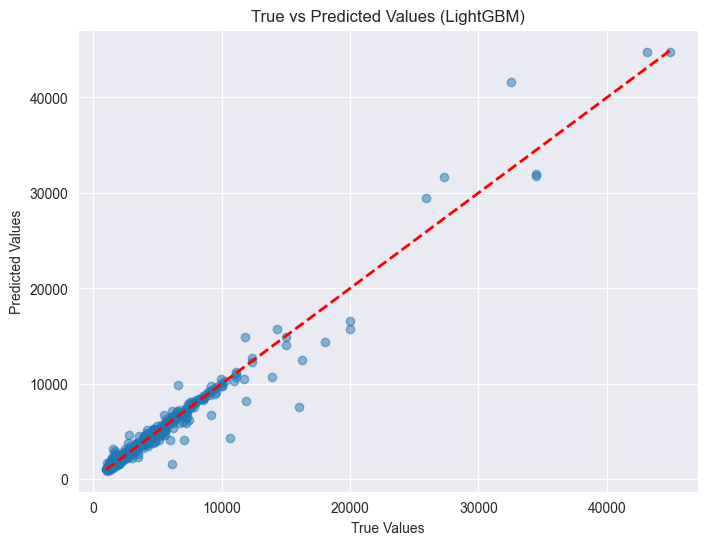

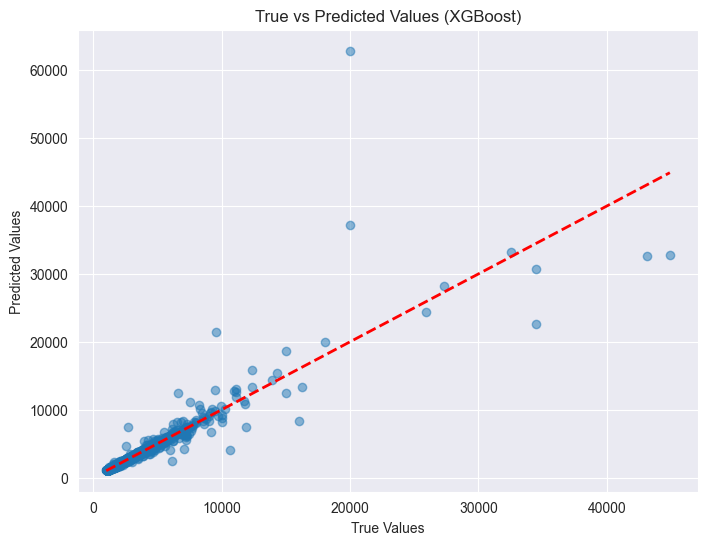

In [27]:
# Visualizing true vs predicted values for all models
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

for name, pred in models.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'True vs Predicted Values ({name})')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'Polish_real_estate_apartment_rental_2022.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Additional Analysis for Dataset
def analyze_dataset(data):
    # Distribution of other quantitative variables
    quantitative_columns = data.select_dtypes(include=['int64', 'float64']).columns
    for col in quantitative_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[col], kde=True, bins='auto')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
        
        plt.figure(figsize=(8, 6))
        sns.boxplot(data[col])
        plt.title(f'Boxplot of {col} to Detect Outliers')
        plt.show()
    
    # Geospatial Analysis
    if 'location' in data.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x='longitude', y='latitude', hue='average_price_pln', s=100, alpha=0.6)
        plt.title('Geospatial Analysis - Average Price by Location')
        plt.show()

    # Correlation Analysis
    corr_matrix = data[quantitative_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Matrix of Quantitative Variables')
    plt.show()

# Perform additional analyses
analyze_dataset(data)

# Allow user to choose how to handle missing values
def handle_missing_values(data):
    print("\nChoose a method to handle missing values:")
    print("1. Drop rows with missing values")
    print("2. Fill with mean")
    print("3. Fill with median")
    print("4. Forward-fill")
    print("5. Backward-fill")
    choice = int(input("Enter your choice (1-5): "))

    if choice == 1:
        return data.dropna()
    elif choice == 2:
        return data.fillna(data.mean())
    elif choice == 3:
        return data.fillna(data.median())
    elif choice == 4:
        return data.fillna(method='ffill')
    elif choice == 5:
        return data.fillna(method='bfill')
    else:
        print("Invalid choice! Defaulting to dropping rows.")
        return data.dropna()
    
# Encoding categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Handle missing values
data = handle_missing_values(data)
print(f"\nShape after handling missing values: {data.shape}")



# Filtering out extreme values in the target variable
data = data[data['average_price_pln'] <= 20000]

# Visualize distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['average_price_pln'], kde=True, bins='auto')
plt.title('Distribution of Average Price (PLN) after Filtering')
plt.xlabel('Average Price (PLN)')
plt.ylabel('Frequency')
plt.show()

# Feature selection
def feature_selection(data, target_column):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    selector = SelectKBest(score_func=f_regression, k='all')
    selector.fit(X, y)
    scores = pd.DataFrame({"Feature": X.columns, "Score": selector.scores_})
    print("\nFeature scores:")
    print(scores.sort_values(by="Score", ascending=False))

# Perform feature selection
feature_selection(data, 'average_price_pln')

# Decomposition of date-time features
def decompose_datetime(data, datetime_column):
    if datetime_column in data.columns:
        data["year"] = pd.to_datetime(data[datetime_column]).dt.year
        data["month"] = pd.to_datetime(data[datetime_column]).dt.month
        data["day"] = pd.to_datetime(data[datetime_column]).dt.day
        data["day_of_week"] = pd.to_datetime(data[datetime_column]).dt.dayofweek
        data.drop(columns=[datetime_column], inplace=True)
        print(f"Decomposed '{datetime_column}' into year, month, day, and day_of_week.")

# Decomposition of week features
def decompose_weeks(data, week_column):
    if week_column in data.columns:
        data["week_of_year"] = data[week_column] % 52
        data["season"] = (data["week_of_year"] // 13).map({0: 'Winter', 1: 'Spring', 2: 'Summer', 3: 'Autumn'})
        print(f"Decomposed '{week_column}' into week_of_year and season.")

# Check and decompose datetime column if present
datetime_column = 'week_no'  # Replace with the actual column name if present
if datetime_column in data.columns:
    decompose_datetime(data, datetime_column)

# Check and decompose week column if present
week_column = 'week_column_name'  # Replace with the actual column name for weeks if present
if week_column in data.columns:
    decompose_weeks(data, week_column)

# Splitting the dataset into training and testing sets
X = data.drop(columns=['average_price_pln'])
y = data['average_price_pln']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and testing set sizes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

# Add more experiments or visualization as needed
